In [1]:
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

import pandas as pd
import string
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
nltk.download('punkt')
nltk.download("stopwords")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Jalee\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Jalee\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
twitter_df = pd.read_csv("Resources/Tweets.csv")

In [6]:
twitter_df

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative
...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive


In [7]:
twitter_df = twitter_df.drop(columns=["textID","selected_text"])

In [49]:
twitter_df

,text,sentiment
0,id responded going,0
1,sooo sad miss san diego,-1
2,boss bullying,-1
3,interview leave alone,-1
4,sons couldnt put releases already bought,-1
...,...,...
27476,wish could come see u denver husband lost job ...,-1
27477,ive wondered rake client made clear net dont f...,-1
27478,yay good enjoy break probably need hectic week...,1
27479,worth,1


In [24]:
def process_tweets(tweet):
    tweet = tweet.lower()
    tweet = "".join(char for char in tweet if char not in string.punctuation)
    tokenize_tweet = word_tokenize(tweet)
    stopword = stopwords.words("english")
    tweet_wo_stop = [word for word in tokenize_tweet if word not in stopword]
    final_tweet = " ".join(tweet_wo_stop)
    return final_tweet

In [25]:
process_tweets("Sooo SAD I will miss you here in San Diego!!!")

'sooo sad miss san diego'

In [26]:
twitter_df['text'] = twitter_df['text'].astype('str')

In [29]:
twitter_df['text'] = twitter_df['text'].apply(lambda x: process_tweets(x))

In [30]:
twitter_df.head()

,text,sentiment
0,id responded going,neutral
1,sooo sad miss san diego,negative
2,boss bullying,negative
3,interview leave alone,negative
4,sons couldnt put releases already bought,negative


In [32]:
# Transform sentiment text into numbers

sentiment = {'positive': 1, 'neutral': 0, 'negative': -1}
twitter_df['sentiment'] = twitter_df['sentiment'].apply(lambda x: sentiment.get(x))

twitter_df.head()

,text,sentiment
0,id responded going,0
1,sooo sad miss san diego,-1
2,boss bullying,-1
3,interview leave alone,-1
4,sons couldnt put releases already bought,-1


<AxesSubplot:ylabel='sentiment'>

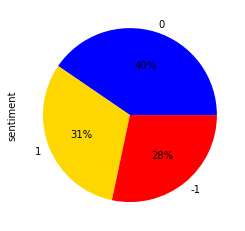

In [33]:
twitter_df.sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=['blue', 'gold', 'red'])

In [34]:
X = twitter_df['text']
y = twitter_df['sentiment']

In [45]:
# Split the data into X_train, X_test, y_train, y_test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [46]:
vectorizer = TfidfVectorizer()
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

In [47]:
from sklearn.ensemble import RandomForestClassifier

twitter_classi = RandomForestClassifier(n_estimators=200, random_state=0)
twitter_classi.fit(X_train_vect, y_train)

RandomForestClassifier(n_estimators=200, random_state=0)

In [48]:
print('RandomForestClassifier Score: ', twitter_classi.score(X_train_vect, y_train))

RandomForestClassifier Score:  0.9978165938864629


In [53]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test.values, twitter_classi.predict(X_test_vect)))
print(classification_report(y_test.values, twitter_classi.predict(X_test_vect)))
print(accuracy_score(y_test.values, twitter_classi.predict(X_test_vect)))

[[ 938  513  112]
 [ 292 1590  313]
 [  59  380 1300]]
              precision    recall  f1-score   support

          -1       0.73      0.60      0.66      1563
           0       0.64      0.72      0.68      2195
           1       0.75      0.75      0.75      1739

    accuracy                           0.70      5497
   macro avg       0.71      0.69      0.70      5497
weighted avg       0.70      0.70      0.70      5497

0.6963798435510279


use select from model (19 day 3, ex 4 and 5)